[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1X6WerwDVRWZ6xGltEvOPL8lT4ddlQc2M)


[![Open In nbviewer](https://jupyter.org/assets/main-logo.svg)](https://nbviewer.jupyter.org/github/hccho2/hccho2FirstGitProject/blob/master/torch_files/MNIST_loading.ipynb)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IRIS Dataset & Pandas

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width=800 height=300 />

iris.csv
1. sepal(꽃받침) length in cm
2. sepal width in cm
3. petal(꽃잎) length in cm
4. petal width in cm
5. class:



150,4,setosa(0),versicolor(1),virginica(2)

6.4,2.8,5.6,2.2,2

5.0,2.3,3.3,1.0,1

4.9,2.5,4.5,1.7,2

4.9,3.1,1.5,0.1,0

5.7,3.8,1.7,0.3,0
<img src="https://bishwamittra.github.io/images/imli/iris_dataset.png" width=600 height=400 />

In [2]:
url = "https://github.com/hccho2/hccho2FirstGitProject/raw/master/iris.csv"  # sklearn에서 다운받은 파일
data = pd.read_csv(url,header=None,skiprows=1,names=['feaure1','feaure2','feaure3','features4','label'])
print(data.shape)
data.head(5)

(150, 5)


,feaure1,feaure2,feaure3,features4,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feaure1    150 non-null    float64
 1   feaure2    150 non-null    float64
 2   feaure3    150 non-null    float64
 3   features4  150 non-null    float64
 4   label      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
data.describe()

,feaure1,feaure2,feaure3,features4,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
#data갯수 확인
#data.groupby('label').count()
data['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

## iris Data 변형하기(map)

In [28]:
url = "https://github.com/hccho2/hccho2FirstGitProject/raw/master/iris2.csv"  # sklearn에서 다운받은 파일
data = pd.read_csv(url,header=None,skiprows=1,names=['feaure1','feaure2','feaure3','features4','label'])
data.head()

,feaure1,feaure2,feaure3,features4,label
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [29]:
data['label'] = data['label'].map({'Setosa': 0,'Versicolor': 1, 'Virginica': 2})

In [31]:
data.sample(5)

,feaure1,feaure2,feaure3,features4,label
54,6.5,2.8,4.6,1.5,1
81,5.5,2.4,3.7,1.0,1
92,5.8,2.6,4.0,1.2,1
131,7.9,3.8,6.4,2.0,2
16,5.4,3.9,1.3,0.4,0


# PCA: Principal Component Analysis(주성분 분석)

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import preprocessing
labels=['setosa','versicolor','virginica']
url = "https://github.com/hccho2/hccho2FirstGitProject/raw/master/iris.csv"  # sklearn에서 다운받은 파일
data = pd.read_csv(url,header=None,skiprows=1,names=['feaure1','feaure2','feaure3','features4','label'])

print(data.head(5))

y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels ---> pandas


#### NORMALIZE X ####
cols = X.columns
print("cols: ", cols)

stdand_scaler = preprocessing.StandardScaler()
X = stdand_scaler.fit_transform(X)  # 입력: dataframe ---> 출력: numpy array
print(X[:10])

   feaure1  feaure2  feaure3  features4  label
0      5.1      3.5      1.4        0.2      0
1      4.9      3.0      1.4        0.2      0
2      4.7      3.2      1.3        0.2      0
3      4.6      3.1      1.5        0.2      0
4      5.0      3.6      1.4        0.2      0
cols:  Index(['feaure1', 'feaure2', 'feaure3', 'features4'], dtype='object')
   feaure1  feaure2  feaure3  features4
0      5.1      3.5      1.4        0.2
1      4.9      3.0      1.4        0.2
2      4.7      3.2      1.3        0.2
3      4.6      3.1      1.5        0.2
4      5.0      3.6      1.4        0.2


In [13]:
print(stdand_scaler.n_samples_seen_)
print("mean: ", stdand_scaler.mean_) # 평균
print('std: ', stdand_scaler.scale_ )  # 표준편차

150
mean:  [5.84333333 3.05733333 3.758      1.19933333]
std:  [0.82530129 0.43441097 1.75940407 0.75969263]


[0.72962445 0.22850762 0.03668922] 0.9948212908928451


Text(0.5, 0, 'Principal Component 3')

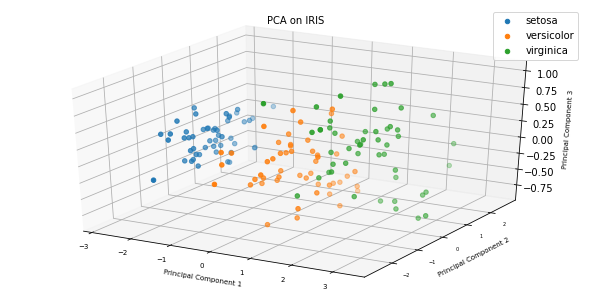

In [ ]:
#### PCA 3 COMPONENTS ####
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)  # principal componet 추출
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])


# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))

fig = plt.figure(figsize = (8, 4))
ax = Axes3D(fig)


for grp_name, grp_idx in finalDf.groupby('label').groups.items():
    y = finalDf.iloc[grp_idx,1]
    x = finalDf.iloc[grp_idx,0]
    z = finalDf.iloc[grp_idx,2]
    ax.scatter(x,y,z, label=labels[grp_name])  # this way you can control color/marker/size of each group freely
ax.legend()
plt.title('PCA on IRIS', fontsize = 10)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 5);
ax.set_xlabel("Principal Component 1", fontsize = 7)
ax.set_ylabel("Principal Component 2", fontsize = 7)
ax.set_zlabel("Principal Component 3", fontsize = 7)

# simaple example(numpy array -> DataFrame)

In [4]:
x1=np.array([ 1.4175,0.3390,0.2925,0.647,0.9069,0.4608,0.1069,-0.2201,-0.0138, -0.5808])
x2=np.array([ 0.1378,-0.0567,1.5304, 0.663,0.0663,-1.0959,0.9882,-0.6808,-0.120,-0.2618])
x3 =['A','B','A','C','C','A','A','B','C','B']
data=pd.DataFrame(data=list(zip(x1,x2,x3)),columns=['age','weight','label'])
data

,age,weight,label
0,1.4175,0.1378,A
1,0.3390,-0.0567,B
2,0.2925,1.5304,A
3,0.6470,0.6630,C
4,0.9069,0.0663,C
5,0.4608,-1.0959,A
6,0.1069,0.9882,A
7,-0.2201,-0.6808,B
8,-0.0138,-0.1200,C
9,-0.5808,-0.2618,B


In [ ]:
data.to_csv('xxx.csv',index=False)   # pd.read_csv

In [ ]:
data[data['label']=='A']  # data.loc[data['label']=='A']

,age,weight,label
0,1.417513,0.137848,A
2,0.292572,1.530484,A
5,0.460830,-1.095967,A
6,0.106969,0.988291,A


In [ ]:
data.groupby('label').mean()

,age,weight
label,,
A,0.569471,0.390164
B,-0.154001,-0.333141
C,0.513632,0.203202


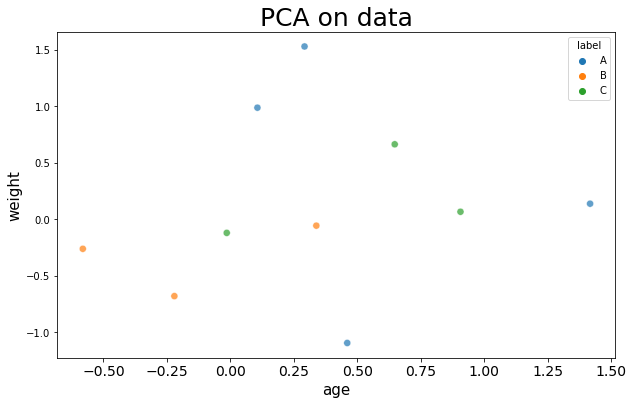

In [ ]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "age", y = "weight", data = data, hue = "label", alpha = 0.7, s = 50); # s=size

plt.title('PCA on data', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("age", fontsize = 15)
plt.ylabel("weight", fontsize = 15)
plt.show()

In [ ]:
data.values

array([[1.41751313, 0.13784849, 'A'],
       [0.33904833, -0.05672081, 'B'],
       [0.29257167, 1.53048402, 'A'],
       [0.6478606, 0.6639671, 'C'],
       [0.90691377, 0.06636203, 'C'],
       [0.46082986, -1.09596719, 'A'],
       [0.10696884, 0.98829064, 'A'],
       [-0.22016277, -0.68083318, 'B'],
       [-0.01387787, -0.1207237, 'C'],
       [-0.58088736, -0.26187014, 'B']], dtype=object)

In [ ]:
data['age'].values

array([ 1.41751313,  0.33904833,  0.29257167,  0.6478606 ,  0.90691377,
        0.46082986,  0.10696884, -0.22016277, -0.01387787, -0.58088736])

In [ ]:
data.sort_values(['label'],ascending=[True]) # data가 바뀌지는 않는다.  inplace=True 해야 바뀐다.

,age,weight,label
0,1.417513,0.137848,A
2,0.292572,1.530484,A
5,0.460830,-1.095967,A
6,0.106969,0.988291,A
1,0.339048,-0.056721,B
7,-0.220163,-0.680833,B
9,-0.580887,-0.261870,B
3,0.647861,0.663967,C
4,0.906914,0.066362,C
8,-0.013878,-0.120724,C


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision', 3)

In [ ]:
data

,age,weight,label
0,1.418,0.138,A
1,0.339,-0.057,B
2,0.293,1.530,A
3,0.648,0.664,C
4,0.907,0.066,C
5,0.461,-1.096,A
6,0.107,0.988,A
7,-0.220,-0.681,B
8,-0.014,-0.121,C
9,-0.581,-0.262,B


In [ ]:
# count()
data.groupby('label').count()


,age,weight
label,,
A,4,4
B,3,3
C,3,3


In [ ]:
# column 1개인 경우.
# from collections import Counter    ---->   Counter(data['label'])  ---->  Counter({'A': 4, 'B': 3, 'C': 3})

data['label'].value_counts()

A    4
B    3
C    3
Name: label, dtype: int64

# IRIS Dataset From sklearn

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()  # dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris['data'].shape, iris['target'].shape

((150, 4), (150,))

In [ ]:
iris['filename'], iris['target_names']

('/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv',
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [ ]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [ ]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [ ]:
data = data.sample(frac = 1) # shffle

In [ ]:
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
80,5.5,2.4,3.8,1.1,1.0
121,5.6,2.8,4.9,2.0,2.0
115,6.4,3.2,5.3,2.3,2.0
29,4.7,3.2,1.6,0.2,0.0
60,5.0,2.0,3.5,1.0,1.0
75,6.6,3.0,4.4,1.4,1.0
130,7.4,2.8,6.1,1.9,2.0
36,5.5,3.5,1.3,0.2,0.0
99,5.7,2.8,4.1,1.3,1.0
128,6.4,2.8,5.6,2.1,2.0


In [ ]:
data.values[:,:3]

array([[5.5, 2.4, 3.8],
       [5.6, 2.8, 4.9],
       [6.4, 3.2, 5.3],
       [4.7, 3.2, 1.6],
       [5. , 2. , 3.5],
       [6.6, 3. , 4.4],
       [7.4, 2.8, 6.1],
       [5.5, 3.5, 1.3],
       [5.7, 2.8, 4.1],
       [6.4, 2.8, 5.6],
       [6.7, 2.5, 5.8],
       [5.2, 4.1, 1.5],
       [5.1, 2.5, 3. ],
       [5.8, 2.7, 5.1],
       [6.1, 2.9, 4.7],
       [5.1, 3.8, 1.5],
       [5.6, 3. , 4.5],
       [7.2, 3.2, 6. ],
       [5.6, 2.7, 4.2],
       [5. , 3.2, 1.2],
       [6. , 2.9, 4.5],
       [5.7, 2.5, 5. ],
       [6.3, 2.7, 4.9],
       [5.6, 2.5, 3.9],
       [6. , 3. , 4.8],
       [5.1, 3.8, 1.6],
       [5.8, 2.8, 5.1],
       [5.7, 3. , 4.2],
       [4.9, 2.5, 4.5],
       [5. , 3.5, 1.6],
       [5. , 3.4, 1.6],
       [5.5, 2.5, 4. ],
       [6.7, 3.3, 5.7],
       [4.9, 2.4, 3.3],
       [5.9, 3. , 4.2],
       [4.7, 3.2, 1.3],
       [4.8, 3. , 1.4],
       [5. , 2.3, 3.3],
       [6.3, 3.3, 4.7],
       [4.8, 3.4, 1.9],
       [6.6, 2.9, 4.6],
       [4.9, 3.6

## Simple Deep Lerning Model with Tensorflow(IRIS)

In [ ]:
from sklearn import datasets
import tensorflow as tf
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),      
    tf.keras.layers.Dense(3, activation='softmax')
])
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)  # pytorch와 달리, 0.01 또는 0.001일 때, 잘된다. 0.0001이면 별로...
# tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)  ---> default: logit이 아니 확률
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # sparse ---> target이 onthot이 아니어도 된다.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(iris['data'], iris['target'], batch_size=32, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 1.7463 - accuracy: 0.3333
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 1.6397 - accuracy: 0.3333
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 1.5481 - accuracy: 0.3333
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 1.4598 - accuracy: 0.3333
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3917 - accuracy: 0.3333
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3485 - accuracy: 0.3333
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 1.3060 - accuracy: 0.3333
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2708 - accuracy: 0.3333
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2416 - accuracy: 0.3333
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 1.2130 - accuracy: 0.3333
Epoch 11/200
5/5 [===========

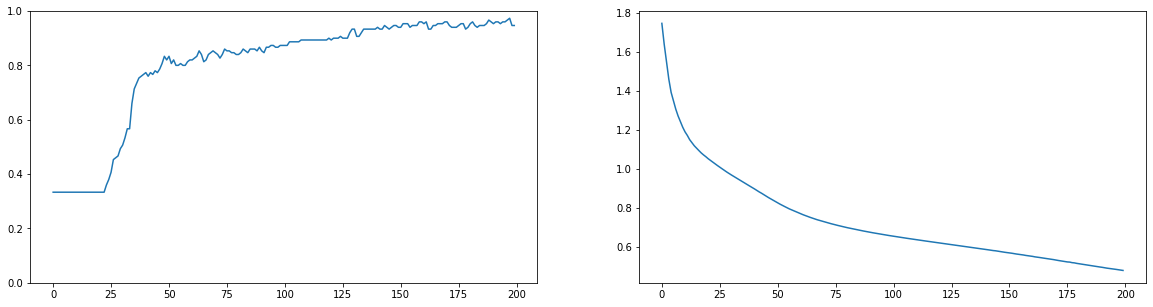

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train accuracy")
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train loss")

## Simple Deep Lerning Model with Pytorch(IRIS)
  * tensorflow 보다 learning rate에 더 민감하다.
  * weight 초기화는 효과가 없다.
  * learning rate을 낮게 하고, train 횟수를 늘이면, 수렴은 한다.

In [ ]:
from sklearn import datasets
import torch
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
import tqdm
from sklearn import preprocessing
import matplotlib.pyplot as plt
iris = datasets.load_iris()

In [ ]:
def weights_init(m):
    if type(m) == nn.Linear:
        #torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.normal_(m.weight, mean=0.0, std=0.1)
        torch.nn.init.zeros_(m.bias)  # m.bias.data.fill_(0.)  
    elif isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.zeros_(m.bias) 

model = nn.Sequential(nn.Linear(4,10),nn.ReLU(),nn.Linear(10,10),nn.ReLU(),nn.Linear(10,3))
#model.apply(weights_init)  # apply는 nn.Module로 부터 상속.

In [ ]:
normal_flag = False

if normal_flag:
    stdand_scaler = preprocessing.StandardScaler()
    data_x = stdand_scaler.fit_transform(iris['data'])  # ---> numpy array
else:
    data_x = iris['data']

X = torch.tensor(data_x, dtype=torch.float32)
Y = torch.tensor(iris['target'],dtype=torch.long)
ds = TensorDataset(X,Y)  # tensor가 들어가야 한다.
loader = DataLoader(ds, batch_size=64, shuffle=True)

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()  # 넘길 때, (N,C), (N,)  <--- one_hot으로 변환하지 않는 target을 넘긴다.
optimizer = optim.Adam(model.parameters(),lr=0.001)   # tensorflow와 달리 lr=0.0001일 때, 잘된다.

In [ ]:
n_epoch = 200

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)
history_loss = []
history_acc  = []
for epoch in range(n_epoch):
    model.train()
    running_loss = []
    acc = 0
    n = 0
    for i,(x,y) in enumerate(loader):
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        loss = loss_fn(pred,y)
        loss.backward()
        optimizer.step()
        running_loss.append(loss.item())
        _,pred = pred.max(1)
        acc += (pred==y).float().sum().item()
        n += len(y)
    
    history_loss.append(np.mean(running_loss))
    history_acc.append(acc/n)
    print('epoch: {}/{}, loss: {:.4f}, acc: {:.4f}'.format(epoch+1,n_epoch,history_loss[-1],history_acc[-1]))
    

cpu
epoch: 1/200, loss: 1.0933, acc: 0.2467
epoch: 2/200, loss: 1.0898, acc: 0.2733
epoch: 3/200, loss: 1.0880, acc: 0.2533
epoch: 4/200, loss: 1.0820, acc: 0.2400
epoch: 5/200, loss: 1.0843, acc: 0.2600
epoch: 6/200, loss: 1.0782, acc: 0.2867
epoch: 7/200, loss: 1.0763, acc: 0.3067
epoch: 8/200, loss: 1.0684, acc: 0.3067
epoch: 9/200, loss: 1.0645, acc: 0.3067
epoch: 10/200, loss: 1.0652, acc: 0.2800
epoch: 11/200, loss: 1.0616, acc: 0.1933
epoch: 12/200, loss: 1.0541, acc: 0.1600
epoch: 13/200, loss: 1.0493, acc: 0.1800
epoch: 14/200, loss: 1.0519, acc: 0.2600
epoch: 15/200, loss: 1.0465, acc: 0.3333
epoch: 16/200, loss: 1.0383, acc: 0.3333
epoch: 17/200, loss: 1.0419, acc: 0.3333
epoch: 18/200, loss: 1.0370, acc: 0.3333
epoch: 19/200, loss: 1.0177, acc: 0.3333
epoch: 20/200, loss: 1.0147, acc: 0.3333
epoch: 21/200, loss: 1.0157, acc: 0.3333
epoch: 22/200, loss: 0.9943, acc: 0.3333
epoch: 23/200, loss: 1.0067, acc: 0.3333
epoch: 24/200, loss: 1.0040, acc: 0.3333
epoch: 25/200, loss: 

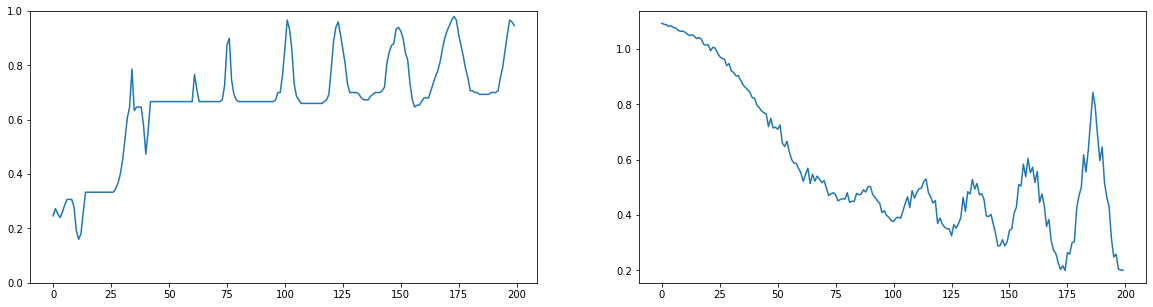

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history_acc, label="train accuracy")
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(history_loss, label="train loss")

## Logitic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import sys
import seaborn as sns
import pandas as pd
import tensorflow as tf

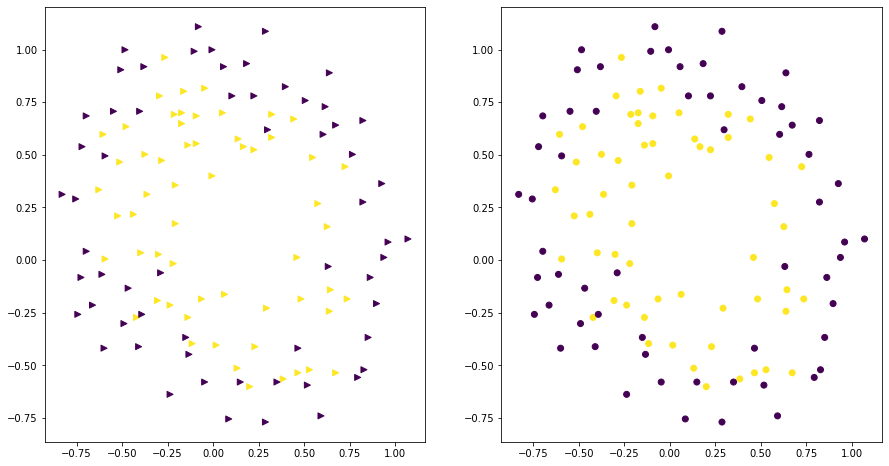

In [ ]:
url = 'https://github.com/hccho2/hccho2FirstGitProject/raw/master/mydata2.txt'
mydata = np.genfromtxt(url,delimiter=',',dtype=np.float32)
A = mydata[:,0:2]
B = mydata[:,-1].reshape(-1,1)  # mydata[:,2:3]
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(A[:, 0], A[:, 1], c=B[:,0],marker=">")
plt.subplot(1,2,2)
plt.scatter(A[:, 0], A[:, 1], c=B[:,0],marker="o")

#A = (A-np.mean(A,0))/np.std(A,0)

In [ ]:
df=pd.DataFrame(data=mydata,columns=['x','y','c'])
df.head(5)
print("data 갯수: ",len(df))

data 갯수:  118


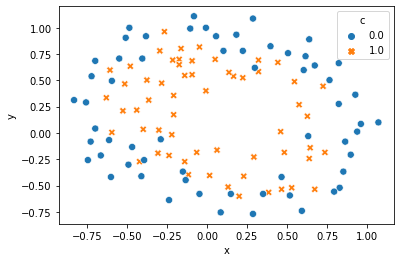

In [ ]:
# pandas dataframe을 넘겨주면 좋다.
sns.scatterplot(x='x', 
                y='y', 
                hue='c', # different colors by group
                style='c', # different shapes by group
                s=50, # marker size
                data=df)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(2,), activation='relu'),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])
optimiser = tf.keras.optimizers.Adam(learning_rate=0.01)  # pytorch와 달리, 0.01 또는 0.001일 때, 잘된다. 0.0001이면 별로...
# tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)  ---> default: logit이 아니 확률
model.compile(optimizer=optimiser, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])  # sparse ---> target이 onthot이 아니어도 된다.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.7267 - accuracy: 0.4915
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.4661
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.3983
Epoch 4/100
2/2 [==============================] - 0s 992us/step - loss: 0.7058 - accuracy: 0.3814
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4322
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.4915
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4831
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4915
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5169
Epoch 11/100
2/2 [=========

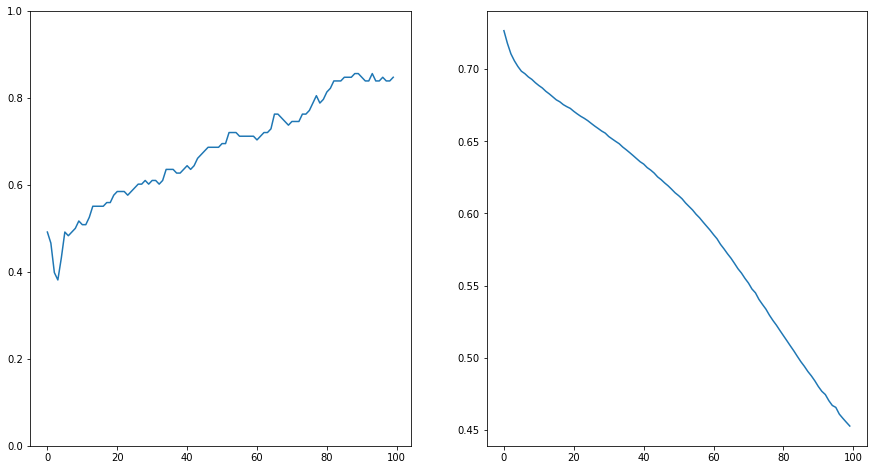

In [ ]:
# 모델의 output이 (N,1) 이므로, target도 (N,1)이 되어야 한다. target이 (N,)이면 안된다.

history = model.fit(A, B, batch_size=64, epochs=100)  # 출력: (N,1), target: (N,1)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train accuracy")
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train loss")

Text(0.5, 1.0, 'tf prediction')

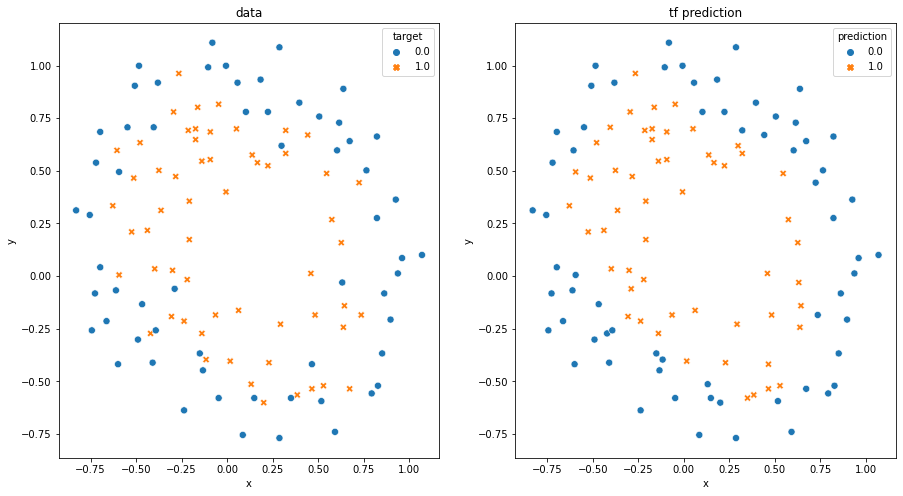

In [ ]:
df1=pd.DataFrame(data=mydata,columns=['x','y','target'])

prediction = (model.predict(A) > 0.5).astype(np.int)
  # np.concatenate([A,prediction],axis=-1)
df2=pd.DataFrame(data=np.c_[A,prediction],columns=['x','y','prediction'])
# pandas dataframe을 넘겨주어면 좋다.


plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='x', 
                y='y', 
                hue='target', # different colors by group
                style='target', # different shapes by group
                s=50, # marker size
                data=df1)
plt.title('data')


plt.subplot(1,2,2)
sns.scatterplot(x='x', 
                y='y', 
                hue='prediction', # different colors by group
                style='prediction', # different shapes by group
                s=50, # marker size
                data=df2)
plt.title('tf prediction')

## xgboost for iris dataset

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from xgboost import XGBClassifier, XGBRFClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = datasets.load_iris()  # dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
labels=['setosa','versicolor','virginica']

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(iris['data'])
Y = [labels[y] for y in iris['target']]

x_train = pd.DataFrame(data= X,columns= iris['feature_names'] )
y_train = pd.Series(data= Y)
print(x_train.head(5))
print(y_train.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0              0.222             0.625              0.068             0.042
1              0.167             0.417              0.068             0.042
2              0.111             0.500              0.051             0.042
3              0.083             0.458              0.085             0.042
4              0.194             0.667              0.068             0.042
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
dtype: object


In [ ]:
xgb = XGBClassifier(n_estimators=150, learning_rate=0.05)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred = xgb.predict(x_train)
np.mean(pred==Y)

1.0

## xgboost for mydata

In [ ]:
url = 'https://github.com/hccho2/hccho2FirstGitProject/raw/master/mydata2.txt'
df = pd.read_csv(url, header=None,names=['x','y','label'])
df.head()

,x,y,label
0,0.051,0.700,1
1,-0.093,0.685,1
2,-0.214,0.692,1
3,-0.375,0.502,1
4,-0.513,0.466,1


In [ ]:
X = df.loc[:, df.columns != 'label']
Y = df['label']  # Series

In [ ]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.05)
xgb.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
prediction = xgb.predict(X)
np.mean(prediction==Y)

0.9152542372881356

Text(0.5, 1.0, 'xgboost prediction')

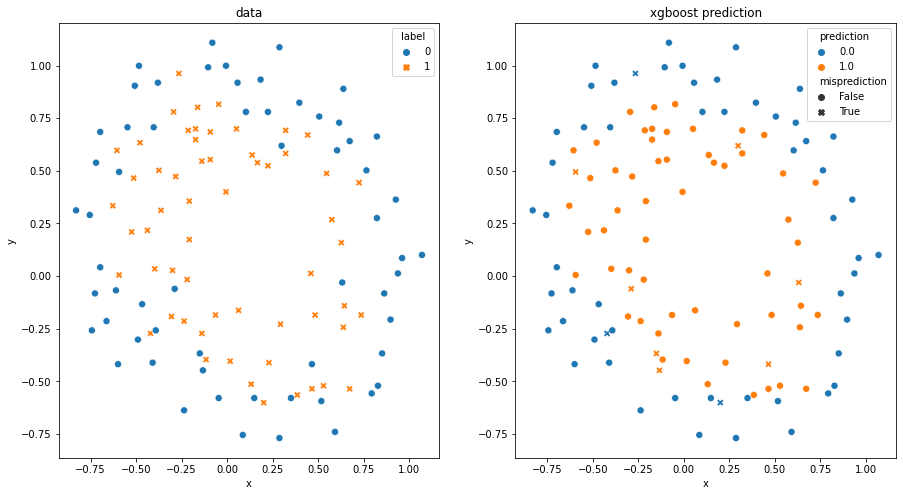

In [ ]:
df_pred=pd.DataFrame(data=np.c_[X.values,Y.values, prediction],columns=['x','y','label','prediction'])
df_pred['misprediction']=df_pred['label'] != df_pred['prediction']
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='x', 
                y='y', 
                hue='label', # different colors by group
                style='label', # different shapes by group
                s=50, # marker size
                data=df)
plt.title('data')


plt.subplot(1,2,2)
sns.scatterplot(x='x', 
                y='y', 
                hue='prediction', # different colors by group
                style='misprediction', # different shapes by group
                s=50, # marker size
                data=df_pred)
plt.title('xgboost prediction')

In [ ]:
df_pred[df_pred['label'] != df_pred['prediction']]

,x,y,label,prediction,misprediction
23,-0.421,-0.273,1.0,0.0,True
25,0.201,-0.602,1.0,0.0,True
30,-0.266,0.963,1.0,0.0,True
60,0.299,0.619,0.0,1.0,True
76,0.466,-0.419,0.0,1.0,True
81,-0.133,-0.448,0.0,1.0,True
104,-0.150,-0.368,0.0,1.0,True
107,-0.289,-0.061,0.0,1.0,True
114,-0.594,0.495,0.0,1.0,True
117,0.633,-0.031,0.0,1.0,True


In [ ]:
df_pred

,x,y,label,prediction,misprediction
0,0.051,0.700,1.0,1.0,False
1,-0.093,0.685,1.0,1.0,False
2,-0.214,0.692,1.0,1.0,False
3,-0.375,0.502,1.0,1.0,False
4,-0.513,0.466,1.0,1.0,False
5,-0.525,0.210,1.0,1.0,False
6,-0.398,0.034,1.0,1.0,False
7,-0.306,-0.192,1.0,1.0,False
8,0.017,-0.404,1.0,1.0,False
9,0.132,-0.514,1.0,1.0,False


In [ ]:
prediction==Y

In [ ]:
5+4